In [8]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 2.3 MB/s eta 0:00:0000:0100:010m
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 1.6 MB/s eta 0:00:0000:0100:01
  Using cached kiwisolver-1.4.4-cp310-cp310-macosx_11_0_arm64.whl (63 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.9/225.9 kB 738.9 kB/s eta 0:00:00a 0:00:01
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
# bySMA.py
from datetime import date, datetime
from typing import Union
import demeter.indicator
from demeter import TokenInfo, PoolBaseInfo,  Strategy, Asset, AccountStatus, CollectFeeAction, SellAction, RowData, \
    ChainType

import pandas as pd


In [13]:
# constant_interval.py -- 3000

import demeter as dt
from demeter import PoolBaseInfo, Actuator
from demeter._typing import TokenInfo, AccountStatus, Asset
from datetime import date
from demeter.download import ChainType

# from strategy_ploter1 import  plot_position_return_decomposition
ETH = TokenInfo(name="eth", decimal=18)
usdc = TokenInfo(name="usdc", decimal=6)
from IPython.display import (display, display_html, display_png, display_svg)
import  matplotlib.pyplot as plt
import numpy as np


In [10]:
# 设置数值
init_value = 2000
str_date_start = '2022-10-1'
str_date_end = '2022-10-30'

In [14]:




class ConstantInterval(dt.Strategy):
    def __init__(self, a=100):
        super().__init__()
        self.a = a

    def initialize(self):
        P0 = self.broker.pool_status.price
        self.rebalance(P0)#rebalance all reserve token#
        # new_position(self, baseToken, quoteToken, usd_price_a, usd_price_b):
        #what is  base/quote "https://corporatefinanceinstitute.com/resources/knowledge/economics/currency-pair/"
        self.add_liquidity(P0 - self.a,
                           P0 + self.a)
        print("eth_value",self.broker.quote_asset.balance)
        super().__init__()


    def rebalance(self, price):
        status: AccountStatus = self.broker.get_account_status(price)
        base_amount = status.net_value / 2
        quote_amount_diff = base_amount / price - status.quote_balance
        if quote_amount_diff > 0:
            self.buy(quote_amount_diff)
        elif quote_amount_diff < 0:
            self.sell(0 - quote_amount_diff)


if __name__ == "__main__":
    eth = TokenInfo(name="eth", decimal=18)
    usdc = TokenInfo(name="usdc", decimal=6)
    pool = PoolBaseInfo(usdc, eth, 0.3, usdc)
    DATE_START = datetime.strptime(str_date_start, "%Y-%m-%d").date()
    DATE_END = datetime.strptime(str_date_end, "%Y-%m-%d").date()

    runner_instance = Actuator(pool)
    runner_instance.enable_notify = False
    runner_instance.strategy = ConstantInterval(200)
    runner_instance.set_assets([Asset(usdc, init_value)])
    runner_instance.data_path = "/Users/wanjinwoo/Desktop/Antalpha/Github/demeter/fork/demeter/data/eth3000"
    runner_instance.load_data(ChainType.Ethereum.name,
                              "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8",
                              DATE_START,
                              DATE_END)
    runner_instance.run(enable_notify=False)
    # print(runner_instance.final_status.net_value)

    # runner_instance.broker.get_account_status(runner_instance.final_status.uncollect_fee_base)
    # plot_position_return_decomposition(runner_instance.account_status_list)



2022-11-15 16:58:13,064 - INFO - start load files from 2022-10-01 to 2022-10-30...
2022-11-15 16:58:13,230 - INFO - load file complete, preparing...
2022-11-15 16:58:14,052 - INFO - data has benn prepared
2022-11-15 16:58:14,052 - INFO - init strategy...
2022-11-15 16:58:14,054 - INFO - start main loop...


eth_value 0.1039468570106734487683813127


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 43196/43196 [00:03<00:00, 14342.09it/s]
2022-11-15 16:58:17,084 - INFO - main loop finished, start calculate evaluating indicator...
2022-11-15 16:58:17,118 - INFO - run evaluating indicator
2022-11-15 16:58:17,119 - INFO - back testing finish


In [15]:
df = pd.DataFrame(runner_instance.account_status_list)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43196 entries, 0 to 43195
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   timestamp          43196 non-null  datetime64[ns]
 1   base_balance       43196 non-null  object        
 2   quote_balance      43196 non-null  object        
 3   base_uncollected   43196 non-null  object        
 4   quote_uncollected  43196 non-null  object        
 5   base_in_position   43196 non-null  object        
 6   quote_in_position  43196 non-null  object        
 7   net_value          43196 non-null  object        
 8   price              43196 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 3.0+ MB


In [16]:
# 计算fee
# uncollect_fee is cumulated so we have to difference first
df['diff_fee_base'] = df['base_uncollected'].diff()
df['diff_fee_quote'] = df['quote_uncollected'].diff()
# 以base计价
df['fee_3000'] = df['diff_fee_base'] + df['diff_fee_quote'] * df['price']

In [18]:
# constant_interval.py -- 500


class ConstantInterval(dt.Strategy):
    def __init__(self, a=100):
        super().__init__()
        self.a = a

    def initialize(self):
        P0 = self.broker.pool_status.price
        self.rebalance(P0)#rebalance all reserve token#
        # new_position(self, baseToken, quoteToken, usd_price_a, usd_price_b):
        #what is  base/quote "https://corporatefinanceinstitute.com/resources/knowledge/economics/currency-pair/"
        self.add_liquidity(P0 - self.a,
                           P0 + self.a)
        print("eth_value",self.broker.quote_asset.balance)
        super().__init__()


    def rebalance(self, price):
        status: AccountStatus = self.broker.get_account_status(price)
        base_amount = status.net_value / 2
        quote_amount_diff = base_amount / price - status.quote_balance
        if quote_amount_diff > 0:
            self.buy(quote_amount_diff)
        elif quote_amount_diff < 0:
            self.sell(0 - quote_amount_diff)


if __name__ == "__main__":
    eth = TokenInfo(name="eth", decimal=18)
    usdc = TokenInfo(name="usdc", decimal=6)
    pool = PoolBaseInfo(usdc, eth, 0.05, usdc)

    runner_instance = Actuator(pool)
    runner_instance.enable_notify = False
    runner_instance.strategy = ConstantInterval(200)
    runner_instance.set_assets([Asset(usdc, init_value)])
    runner_instance.data_path = "/Users/wanjinwoo/Desktop/Antalpha/Github/demeter/fork/demeter/data/eth500"
    runner_instance.load_data(ChainType.Ethereum.name,
                              "0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640",
                              DATE_START,
                              DATE_END)
    runner_instance.run(enable_notify=False)
    # print(runner_instance.final_status.net_value)



2022-11-16 01:23:22,485 - INFO - start load files from 2022-10-01 to 2022-10-30...
2022-11-16 01:23:22,670 - INFO - load file complete, preparing...
2022-11-16 01:23:23,505 - INFO - data has benn prepared
2022-11-16 01:23:23,507 - INFO - init strategy...
2022-11-16 01:23:23,508 - INFO - start main loop...


eth_value 0.1018824758212338999711707481


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 43200/43200 [00:03<00:00, 13975.62it/s]
2022-11-16 01:23:26,601 - INFO - main loop finished, start calculate evaluating indicator...
2022-11-16 01:23:26,636 - INFO - run evaluating indicator
2022-11-16 01:23:26,637 - INFO - back testing finish


In [19]:
df1 = pd.DataFrame(runner_instance.account_status_list)
df1['diff_fee_base'] = df1['base_uncollected'].diff()
df1['diff_fee_quote'] = df1['quote_uncollected'].diff()
df1['fee_500'] = df1['diff_fee_base'] + df1['diff_fee_quote'] * df1['price']


In [20]:
# merge
df_all = df.merge(df1, on = 'timestamp', how = 'left')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43196 entries, 0 to 43195
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            43196 non-null  datetime64[ns]
 1   base_balance_x       43196 non-null  object        
 2   quote_balance_x      43196 non-null  object        
 3   base_uncollected_x   43196 non-null  object        
 4   quote_uncollected_x  43196 non-null  object        
 5   base_in_position_x   43196 non-null  object        
 6   quote_in_position_x  43196 non-null  object        
 7   net_value_x          43196 non-null  object        
 8   price_x              43196 non-null  object        
 9   diff_fee_base_x      43195 non-null  object        
 10  diff_fee_quote_x     43195 non-null  object        
 11  fee_3000             43195 non-null  object        
 12  base_balance_y       43196 non-null  object        
 13  quote_balance_y      43196 non-

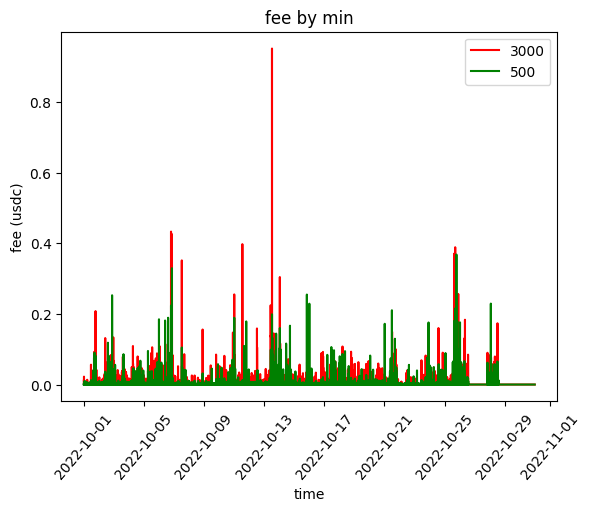

In [21]:
# 画图
%matplotlib inline

plt.figure()
fee_3000 = list(df_all['fee_3000'].apply(pd.to_numeric))
fee_500 = list(df_all['fee_500'].apply(pd.to_numeric))
timestamp = list(df_all['timestamp'])
plt.plot(timestamp, fee_3000, c='red', label="3000")
plt.plot(timestamp, fee_500, c='green', label="500")
plt.title('fee by min')
plt.legend()
plt.xlabel('time')
plt.ylabel('fee (usdc)')
plt.xticks(rotation=50)
plt.show()

In [22]:
# by day

df_all['Date'] = pd.to_datetime(df_all['timestamp'].dt.date)
df_all['fee_3000_day'] = df_all['fee_3000'].groupby(df_all['Date']).transform('sum')
df_all['fee_500_day'] = df_all['fee_500'].groupby(df_all['Date']).transform('sum')

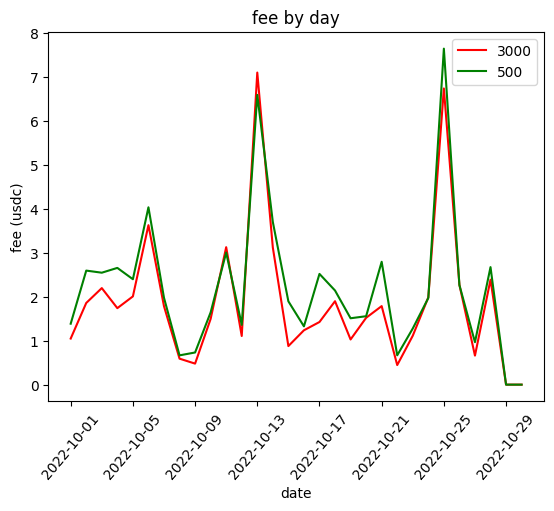

In [23]:
plt.figure()
fee_3000 = list(df_all['fee_3000_day'].apply(pd.to_numeric))
fee_500 = list(df_all['fee_500_day'].apply(pd.to_numeric))
date = list(df_all['Date'])
plt.plot(date, fee_3000, c='red', label="3000")
plt.plot(date, fee_500, c='green', label="500")
plt.legend()
plt.title('fee by day')
plt.xlabel('date')
plt.ylabel('fee (usdc)')
plt.xticks(rotation=50)
plt.show()

In [24]:
# APR

df_all['APR_3000'] = df_all['fee_3000_day'] / init_value *365
df_all['APR_500'] = df_all['fee_500_day'] / init_value *365

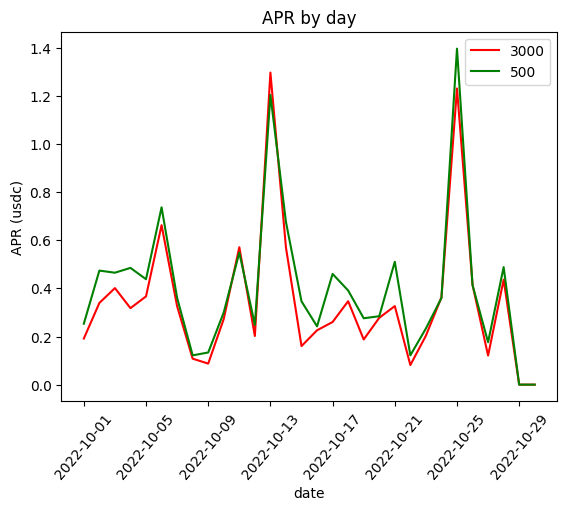

In [25]:
plt.figure()
APR_3000 = list(df_all['APR_3000'].apply(pd.to_numeric))
APR_500 = list(df_all['APR_500'].apply(pd.to_numeric))
date = list(df_all['Date'])
plt.plot(date, APR_3000, c='red', label="3000")
plt.plot(date, APR_500, c='green', label="500")
plt.legend()
plt.title('APR by day')
plt.xlabel('date')
plt.ylabel('APR (usdc)')
plt.xticks(rotation=50)
plt.show()